In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_loc='../ADNI_data/future_dx_prediction_alz_plos/'
df_all = pd.read_csv(file_loc+'step5_modified_mri_alz_future_prediction_plos.csv')

In [3]:
# file_loc3 = "../../../../data_evaluation_curation/"
df_DX_EDU_APOE=pd.read_csv('df_step1_addedmri_dep_fl.csv')

E:\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
path_to_read = '../ADNI_data/future_dx_prediction_alz_plos/plos_final_output_data/'
sample_points = pd.read_csv(path_to_read+'sample_points.csv', low_memory=False)
sample_points.shape

(1256, 174)

In [5]:
df_DX_EDU_APOE['psy_edu_status']=df_DX_EDU_APOE['psycond']+ '_' + df_DX_EDU_APOE['edu_status']

feature_col= ['GDTOTAL','IMAGEUID'] +  df_DX_EDU_APOE.columns[66:-4].tolist() 
feature_col_1= ['GDTOTAL'] +  df_DX_EDU_APOE.columns[66:-4].tolist() 
feature_col_2=df_DX_EDU_APOE.columns[58:65].tolist() +  ['GDTOTAL']

In [6]:
df_DX_EDU_APOE_fc=df_DX_EDU_APOE[feature_col]

In [7]:
imageid=[]
for i in range(1256):
    imageid.append(sample_points.loc[i,'IMAGEUID'])
    imageid.append(sample_points.loc[i,'IMAGEUID.1'])
    imageid.append(sample_points.loc[i,'IMAGEUID.2'])

In [8]:
df_all_imageid=pd.concat([df_all,pd.DataFrame(imageid)],axis=1).rename(columns={0:'IMAGEUID'})

In [9]:
df_all_mri=df_DX_EDU_APOE[feature_col].dropna().merge(df_all_imageid,on = 'IMAGEUID',how='right')

In [10]:
df_all_mri.shape,df_all_mri[feature_col_1].dropna().shape

((3768, 32), (3586, 18))

In [11]:
df_all_mri.IMAGEUID.count()

3613

In [12]:
# 3768-3613 = 155
# 3768-3586

In [13]:
# df_all_mri[feature_col_1].dropna().head(50)

In [14]:
mean = df_all_mri.filter(feature_col_1).mean()
mean

GDTOTAL                              1.413274
RightTemporalPole                 2000.606804
RightParahippocampal              1921.087563
RightInferiorTemporal             9665.565254
RightInferiorParietal            12964.072504
RightIsthmusCingulate             2125.177914
RightBankssts                     2108.126882
RightPrecuneus                    8411.686280
RightAmygdala                     1375.973648
RightAccumbensArea                 478.965393
RightMedialOrbitofrontal          4304.588399
RightPallidum                     1437.989431
RightCaudalMiddleFrontal          5123.440045
RightPutamen                      4624.298215
RightRostralAnteriorCingulate     1834.241216
RightParacentral                  3390.566090
RightPrecentral                  11386.471835
RightLingual                      5873.482989
dtype: float64

In [15]:
df_all_mri[feature_col_1]=df_all_mri[feature_col_1].fillna(mean)

In [16]:
df_all_mri.shape,df_all_mri[feature_col_1].dropna().shape

((3768, 32), (3768, 18))

In [17]:
df_all_mri.head(10)

,GDTOTAL,IMAGEUID,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,RightInferiorParietal,RightIsthmusCingulate,RightBankssts,RightPrecuneus,RightAmygdala,...,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,FollowupYear,FollowupDX,TrainValTest
0,0.000000,32246.0,1999.000000,2305.000000,9870.000000,14826.000000,2096.000000,2497.000000,9306.00000,1159.000000,...,-0.120875,0.745614,1.090645e+00,3.236834e+00,5.530345e-01,6.861566e-01,CN,3,CN,Train
1,0.000000,31906.0,1843.000000,2037.000000,10008.000000,14374.000000,2056.000000,2480.000000,8836.00000,1219.000000,...,-0.290017,0.718848,-7.250730e-02,3.097285e+00,2.464277e-01,6.243322e-01,CN,3,CN,Train
2,0.000000,200385.0,1950.000000,2088.000000,10405.000000,14361.000000,2024.000000,2211.000000,8871.00000,1231.000000,...,-0.382065,0.757268,1.118476e+00,2.827450e+00,-8.716197e-03,6.582306e-01,CN,3,CN,Train
3,0.000000,33025.0,1766.000000,1612.000000,6909.000000,12710.000000,2756.000000,2723.000000,8562.00000,897.000000,...,-1.851419,-1.114426,-2.164168e+00,3.875731e-02,-1.077173e+00,-3.243469e-01,MCI,3,MCI,Train
4,0.000000,62348.0,1536.000000,1678.000000,7301.000000,13140.000000,2972.000000,2962.000000,8517.00000,963.000000,...,-1.550377,-0.817731,-1.976517e+00,4.384277e-02,-7.487493e-01,-1.680326e-01,MCI,3,MCI,Train
5,1.413274,NaN,2000.606804,1921.087563,9665.565254,12964.072504,2125.177914,2108.126882,8411.68628,1375.973648,...,0.000000,0.000000,2.000000e-14,-2.080000e-14,2.590000e-14,7.730000e-15,MCI,3,MCI,Train
6,1.413274,NaN,2000.606804,1921.087563,9665.565254,12964.072504,2125.177914,2108.126882,8411.68628,1375.973648,...,0.000000,0.000000,2.000000e-14,-2.080000e-14,2.590000e-14,7.730000e-15,CN,3,CN,Test
7,1.413274,NaN,2000.606804,1921.087563,9665.565254,12964.072504,2125.177914,2108.126882,8411.68628,1375.973648,...,0.000000,0.000000,2.000000e-14,-2.080000e-14,2.590000e-14,7.730000e-15,CN,3,CN,Train
8,1.413274,NaN,2000.606804,1921.087563,9665.565254,12964.072504,2125.177914,2108.126882,8411.68628,1375.973648,...,0.000000,0.000000,2.000000e-14,-2.080000e-14,2.590000e-14,7.730000e-15,MCI,3,MCI,Val
9,1.413274,NaN,2000.606804,1921.087563,9665.565254,12964.072504,2125.177914,2108.126882,8411.68628,1375.973648,...,0.000000,0.000000,2.000000e-14,-2.080000e-14,2.590000e-14,7.730000e-15,MCI,3,Dementia,Train


In [18]:
df_all_mri[feature_col_1]=(df_all_mri[feature_col_1]-df_all_mri[feature_col_1].mean())/df_all_mri[feature_col_1].std()

In [19]:
df_all_mri.columns

Index(['GDTOTAL', 'IMAGEUID', 'RightTemporalPole', 'RightParahippocampal',
       'RightInferiorTemporal', 'RightInferiorParietal',
       'RightIsthmusCingulate', 'RightBankssts', 'RightPrecuneus',
       'RightAmygdala', 'RightAccumbensArea', 'RightMedialOrbitofrontal',
       'RightPallidum', 'RightCaudalMiddleFrontal', 'RightPutamen',
       'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral',
       'RightLingual', 'RID', 'Yr_visit', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX',
       'FollowupYear', 'FollowupDX', 'TrainValTest'],
      dtype='object')

In [38]:
df_all_mri.shape

(3768, 32)

In [43]:
df_all_mri_imageidna_drop=df_all_mri.dropna(subset=['IMAGEUID'])
df_all_mri_imageidna_drop.shape,3768-3613

((3613, 32), 155)

In [23]:
# df_all_mri_imageidna_drop.head(20)

In [24]:
df_all_mri_imageidna_drop_visit_count_fy_3=pd.DataFrame(df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==3].RID.value_counts()).rename(columns={'RID':'Yr_visit_ct'}).reset_index().rename(columns={'index':'RID'})
fy_3_visit_count_3_rid_list=df_all_mri_imageidna_drop_visit_count_fy_3[df_all_mri_imageidna_drop_visit_count_fy_3['Yr_visit_ct']==3]['RID'].tolist()
len(fy_3_visit_count_3_rid_list)

453

In [25]:
df_all_mri_imageidna_drop_visit_count_fy_4=pd.DataFrame(df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==4].RID.value_counts()).rename(columns={'RID':'Yr_visit_ct'}).reset_index().rename(columns={'index':'RID'})
fy_4_visit_count_3_rid_list=df_all_mri_imageidna_drop_visit_count_fy_4[df_all_mri_imageidna_drop_visit_count_fy_4['Yr_visit_ct']==3]['RID'].tolist()
len(fy_4_visit_count_3_rid_list)

422

In [26]:
df_all_mri_imageidna_drop_visit_count_fy_5=pd.DataFrame(df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==5].RID.value_counts()).rename(columns={'RID':'Yr_visit_ct'}).reset_index().rename(columns={'index':'RID'})
fy_5_visit_count_3_rid_list=df_all_mri_imageidna_drop_visit_count_fy_5[df_all_mri_imageidna_drop_visit_count_fy_5['Yr_visit_ct']==3]['RID'].tolist()
len(fy_5_visit_count_3_rid_list)

255

In [27]:
visit_count_3_rid_list = fy_3_visit_count_3_rid_list + fy_4_visit_count_3_rid_list +fy_5_visit_count_3_rid_list
len(visit_count_3_rid_list)

1130

In [28]:
453+422+255

1130

In [45]:
df_all_mri_imageidna_drop.RID.nunique()

633

In [29]:
df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==3].RID.value_counts().value_counts()

3    453
2     45
1      9
Name: RID, dtype: int64

In [30]:
df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==4].RID.value_counts().value_counts()

3    422
2     34
1      7
Name: RID, dtype: int64

In [31]:
df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['FollowupYear']==5].RID.value_counts().value_counts()

3    255
2     22
1      5
Name: RID, dtype: int64

In [32]:
visit_count_3_rid_list_final=pd.DataFrame(visit_count_3_rid_list).drop_duplicates()[0].tolist()

In [33]:
df_all_mri_imageidna_drop_all3visits=df_all_mri_imageidna_drop[df_all_mri_imageidna_drop['RID'].isin(visit_count_3_rid_list_final)].sort_values(by=['FollowupYear','RID','Yr_visit'])
df_all_mri_imageidna_drop_all3visits.shape

(3390, 32)

In [35]:
df_all_mri_imageidna_drop_all3visits['Yr_visit'].diff().value_counts()

 1.0    2260
-2.0    1129
Name: Yr_visit, dtype: int64

In [36]:
1129*3

3387

In [42]:
df_all_mri_imageidna_drop_all3visits.shape

(3390, 32)

In [ ]:
'RightTemporalPole', 'RightParahippocampal'

In [46]:
df_all_mri[['RightAmygdala','RightParahippocampal']].corr()

,RightAmygdala,RightParahippocampal
RightAmygdala,1.000000,0.502297
RightParahippocampal,0.502297,1.000000


In [49]:
df_all_mri_imageidna_drop_all3visits[['RightAmygdala','RightParahippocampal']].corr()

,RightAmygdala,RightParahippocampal
RightAmygdala,1.000000,0.501675
RightParahippocampal,0.501675,1.000000


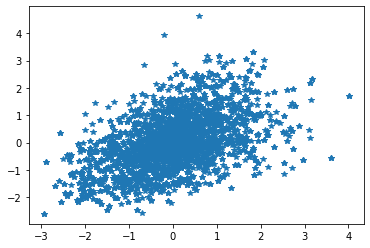

In [47]:
plt.plot(df_all_mri['RightAmygdala'],df_all_mri['RightParahippocampal'],'*')

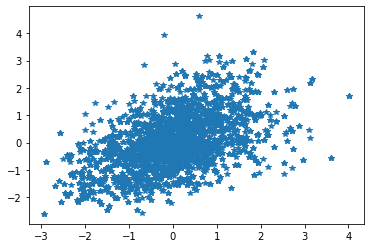

In [48]:
plt.plot(df_all_mri_imageidna_drop_all3visits['RightAmygdala'],df_all_mri_imageidna_drop_all3visits['RightParahippocampal'],'*')

In [41]:
3768-3390,378/3

(378, 126.0)

In [61]:
df_all_mri_imageidna_drop_all3visits.RID.nunique()

562

In [79]:
df_all_mri_imageidna_drop_all3visits.columns[2:-3]

Index(['RightTemporalPole', 'RightParahippocampal', 'RightInferiorTemporal',
       'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts',
       'RightPrecuneus', 'RightAmygdala', 'RightAccumbensArea',
       'RightMedialOrbitofrontal', 'RightPallidum', 'RightCaudalMiddleFrontal',
       'RightPutamen', 'RightRostralAnteriorCingulate', 'RightParacentral',
       'RightPrecentral', 'RightLingual', 'RID', 'Yr_visit', 'Ventricles',
       'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV',
       'DX'],
      dtype='object')

In [82]:
df_all_mri_RID_unique_plos=df_all_mri_imageidna_drop_all3visits[df_all_mri_imageidna_drop_all3visits.columns[2:-3]].drop_duplicates()
df_all_mri_RID_unique_plos.shape,df_all_mri_RID_unique_plos.RID.nunique()

((1686, 27), 562)

In [83]:
df_pivot_followupyr_dx=pd.pivot(data=df_all_mri_imageidna_drop_all3visits[['RID','FollowupYear','FollowupDX']].drop_duplicates(),index='RID',columns='FollowupYear',values='FollowupDX')

In [85]:
df_all_mri_RID_unique_plos_fyr345=df_all_mri_RID_unique_plos.merge(df_pivot_followupyr_dx,on='RID')
df_all_mri_RID_unique_plos_fyr345.shape

(1686, 30)

In [70]:
562*3

1686

In [88]:
df_all_mri_RID_unique_plos_fyr345.rename(columns={3:'FYR3DX',4:'FYR4DX',5:'FYR5DX'},inplace=True)

In [34]:
# df_all_mri.to_csv('step5_modified_all_mri_alz_future_prediction_plos.csv',index=False)

# df_all_mri_imageidna_drop_all3visits.to_csv('step5_modified_all_mri_imageidna_drop_alz_future_prediction_plos.csv',index=False)

In [89]:
# df_all_mri_RID_unique_plos_fyr345.to_csv('df_all_mri_RID_unique_plos_fyr345.csv',index=False)